# Polynomial Regression

# Data Preprocessing

#### It is a data mining technique that transforms raw data into an understandable format. Raw data(real world data) is always incomplete and that data cannot be sent through a model. That would cause certain errors. That is why we need to preprocess data before sending through a model.

Steps in Data Preprocessing
These are the steps:
1. Import libraries
2. Import dataset
3. Finding for missing values
4. Encoding categorical data
5. Data splitting
6. Feature Scaling

# 1. Importing Libraries

In [39]:
#Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# 2. Importing Dataset

In [40]:
# Importing Dataset 
data = pd.read_csv('Data_India_Population.csv')
data.shape

(71, 5)

In [42]:
data.describe()

,Year,Population_India_in_thousands,India Population_in_Crores,Change,Rate (%)
count,71.000000,7.100000e+01,7.100000e+01,7.000000e+01,70.000000
mean,1985.000000,8.209668e+05,8.145066e+08,1.433827e+07,1.874429
std,20.639767,3.195217e+05,3.313496e+08,3.877162e+06,0.404090
min,1950.000000,3.763250e+05,9.639226e+05,6.051748e+06,0.990000
25%,1967.500000,5.259575e+05,5.259572e+08,1.122756e+07,1.640000
50%,1985.000000,7.843600e+05,7.843600e+08,1.507645e+07,1.950000
75%,2002.500000,1.102420e+06,1.102420e+09,1.784602e+07,2.202500
max,2020.000000,1.380004e+06,1.380004e+09,1.858355e+07,2.360000


In [43]:
data

,Year,Population_India_in_thousands,India Population_in_Crores,Change,Rate (%)
0,2020,1380004,1.380004e+09,13586631.0,0.99
1,2019,1366418,1.366418e+09,13775474.0,1.02
2,2018,1352642,1.352642e+09,13965495.0,1.04
3,2017,1338677,1.338677e+09,14159536.0,1.07
4,2016,1324517,1.324517e+09,14364846.0,1.10
...,...,...,...,...,...
66,1954,402579,4.025786e+08,7034227.0,1.78
67,1953,395544,3.955444e+08,6745296.0,1.73
68,1952,388799,3.887991e+08,6422125.0,1.68
69,1951,382377,3.823769e+08,6051748.0,1.61


In [5]:
data.head()

,Year,Population_India_in_thousands,India Population_in_Crores,Change,Rate (%)
0,2020,1380004,1.380004e+09,13586631.0,0.99
1,2019,1366418,1.366418e+09,13775474.0,1.02
2,2018,1352642,1.352642e+09,13965495.0,1.04
3,2017,1338677,1.338677e+09,14159536.0,1.07
4,2016,1324517,1.324517e+09,14364846.0,1.10


In [6]:
data.tail()

,Year,Population_India_in_thousands,India Population_in_Crores,Change,Rate (%)
66,1954,402579,402578596.0,7034227.0,1.78
67,1953,395544,395544369.0,6745296.0,1.73
68,1952,388799,388799073.0,6422125.0,1.68
69,1951,382377,382376948.0,6051748.0,1.61
70,1950,376325,376325200.0,NaN,NaN


# 3. Checking missing value

In [44]:
data.isnull()

,Year,Population_India_in_thousands,India Population_in_Crores,Change,Rate (%)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
66,False,False,False,False,False
67,False,False,False,False,False
68,False,False,False,False,False
69,False,False,False,False,False


In [46]:
data.isnull().any()

Year                             False
Population_India_in_thousands    False
India Population_in_Crores       False
Change                            True
Rate (%)                          True
dtype: bool

In [47]:
data.isnull().sum()

Year                             0
Population_India_in_thousands    0
India Population_in_Crores       0
Change                           1
Rate (%)                         1
dtype: int64

# 4. Encoding Categorical Data
#### There is no Categorical Data

# 5. Data splitting

In [49]:
#Extracting Independent and dependent Variable  
X = data['Year']
Y = data['Population_India_in_thousands']

In [50]:
X

0     2020
1     2019
2     2018
3     2017
4     2016
      ... 
66    1954
67    1953
68    1952
69    1951
70    1950
Name: Year, Length: 71, dtype: int64

In [51]:
Y

0     1380004
1     1366418
2     1352642
3     1338677
4     1324517
       ...   
66     402579
67     395544
68     388799
69     382377
70     376325
Name: Population_India_in_thousands, Length: 71, dtype: int64

In [52]:
x = np.array(X).reshape(-1,1)
y = np.array(Y).reshape(-1,1)

In [12]:
#y_log = np.log(data['Population_India_in_thousands'])

In [13]:
#y_log = np.array(y_log).reshape(-1,1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [54]:
# Fitting Linear Regression to the dataset 
lin = LinearRegression() 
lin.fit(x, y)

LinearRegression()

In [55]:
# Fitting Polynomial Regression to the dataset 
  
poly = PolynomialFeatures(degree = 6) 

In [56]:
X_poly = poly.fit_transform(x)

In [57]:
poly.fit(X_poly, y)

PolynomialFeatures(degree=6)

In [58]:
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression()

In [59]:
y_poly_pred = lin2.predict(X_poly)

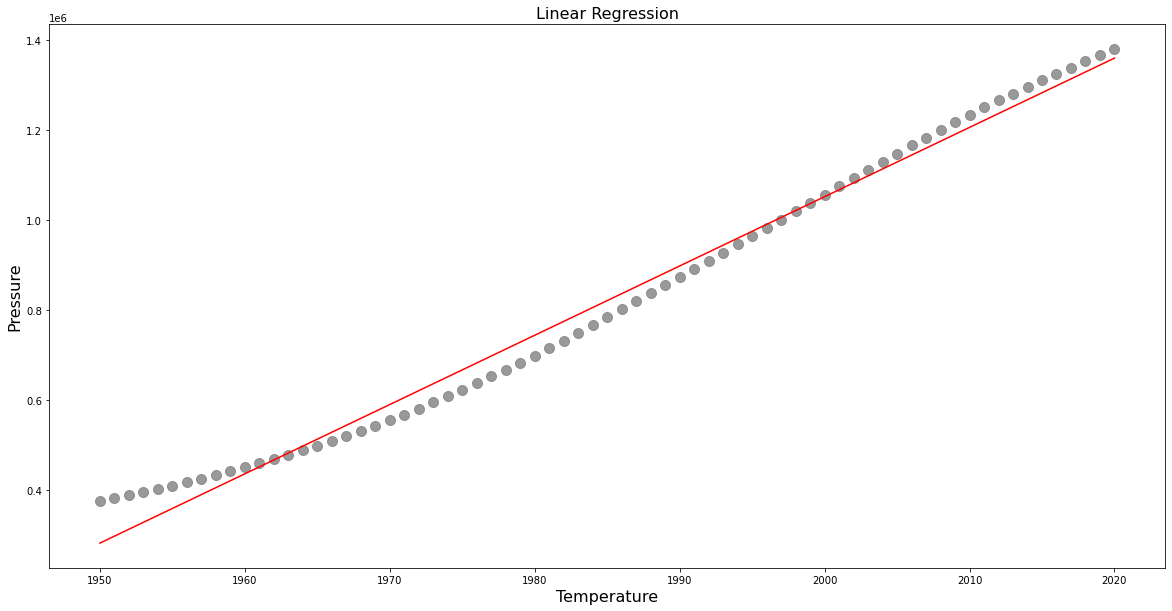

In [60]:
# Visualising the Linear Regression results 
fig = plt.figure(figsize=[20, 10])

plt.scatter(x, y, color = 'gray', s = 100, alpha = 0.8)   
plt.plot(x, lin.predict(x), color = 'red') 
plt.title('Linear Regression', fontsize = 16) 
plt.xlabel('Temperature', fontsize = 16) 
plt.ylabel('Pressure', fontsize = 16) 
  
plt.show() 

In [61]:
mse =  mean_squared_error(y,y_poly_pred)
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(mse)
print(rmse)
print(r2)

10195976.41739262
3193.113906109931
0.9998987049352985


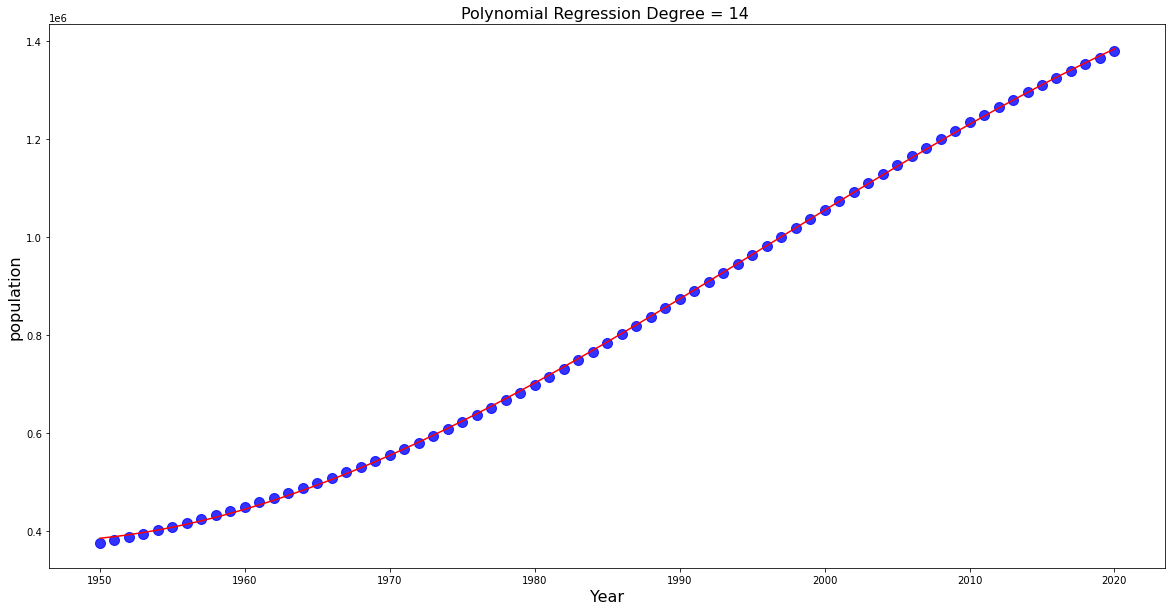

In [62]:
# Visualising the Polynomial Regression results 
fig = plt.figure(figsize=[20, 10])
plt.scatter(x, y, color = 'blue', s = 100, alpha = 0.8) 
  
plt.plot(x, lin2.predict(X_poly), color = 'red') 
plt.title('Polynomial Regression Degree = 14 ', fontsize = 16) 
plt.xlabel('Year', fontsize = 16) 
plt.ylabel('population', fontsize = 16) 
  
plt.show() 

In [67]:
poly.fit_transform([[2022]])

array([[1.00000000e+00, 2.02200000e+03, 4.08848400e+06, 8.26691465e+09,
        1.67157014e+13, 3.37991483e+16, 6.83418778e+19]])

In [70]:
a = lin2.predict(poly.fit_transform([[2022]])) * 1000

In [71]:
a[0][0]

1411045745.1508045

In [72]:
lin.predict([[2021]])

array([[1374947.54849095]])

In [73]:
1393258537.2354612

1393258537.2354612